## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df= pd.merge(mouse_metadata, study_results, on=['Mouse ID'] )

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice.

combined_data_df["Mouse ID"].count()


1893

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
dup_df=pd.DataFrame(combined_data_df, columns=["Mouse ID", "Timepoint"])
duplicates=dup_df.loc[dup_df.duplicated(keep='last')]
duplicates


,Mouse ID,Timepoint
908,g989,0
910,g989,5
912,g989,10
914,g989,15
916,g989,20


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
dupall_df=combined_data_df.copy()
duplicates_all=dupall_df.loc[dup_df.duplicated(keep='last')]
duplicates_all


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=dupall_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
clean_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [39]:
# Checking the number of mice and the list of non deleted rows in the clean DataFrame.
print("Count of Mouse Ids :", clean_data["Mouse ID"].count())
dup_of_deleted=clean_data.loc[clean_data["Mouse ID"]=='g989'].reset_index()
print(dup_of_deleted[["Mouse ID", "Drug Regimen",  "Timepoint"]])

Count of Mouse Ids : 1888
  Mouse ID Drug Regimen  Timepoint
0     g989     Propriva          0
1     g989     Propriva          5
2     g989     Propriva         10
3     g989     Propriva         15
4     g989     Propriva         20
5     g989     Propriva         25
6     g989     Propriva         30
7     g989     Propriva         35


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df=pd.DataFrame(clean_data, columns=["Drug Regimen", "Tumor Volume (mm3)"])
drug_df=drug_df.rename(columns={"Tumor Volume (mm3)" : "Tumor_vol"})
#print(drug_df)
mean_ps=drug_df.groupby("Drug Regimen").mean()
median_ps=drug_df.groupby("Drug Regimen").median()
var_ps=drug_df.groupby("Drug Regimen").var()
std_ps=drug_df.groupby("Drug Regimen").std()
sem_ps=drug_df.groupby("Drug Regimen").sem()
merge1=pd.merge(mean_ps, median_ps, on=['Drug Regimen'])
merge1=merge1.rename(columns={"Tumor_vol_x" : "Mean",
                              "Tumor_vol_y" : "Median"})
merge2=pd.merge(merge1, var_ps, on=['Drug Regimen'])

merge2=merge2.rename(columns={"Tumor_vol" : "Variance" })
merge3=pd.merge(merge2, std_ps, on=['Drug Regimen'])
merge3=merge3.rename(columns={"Tumor_vol" : "STD" })
summary_df=pd.merge(merge3, sem_ps, on=['Drug Regimen'])
summary_df=summary_df.rename(columns={"Tumor_vol" : "SEM"})
print(summary_df)


                   Mean     Median   Variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_df.groupby('Drug Regimen').Tumor_vol.agg(['mean', 'median','var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

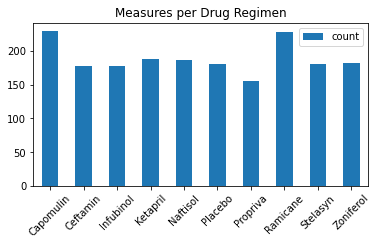

In [97]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measures_df=drug_df.groupby('Drug Regimen').Tumor_vol.agg(['count']).reset_index()
p_plot = measures_df.plot(kind="bar",title='Measures per Drug Regimen',figsize=(6,3) )
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
p_plot.set_xticklabels(measures_df['Drug Regimen'], rotation=45)
plt.show()

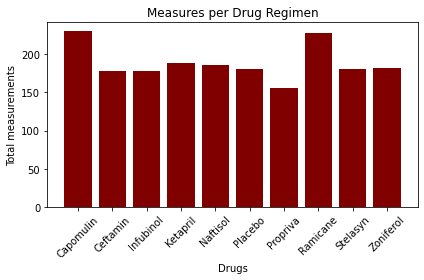

In [98]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measures_df=drug_df.groupby('Drug Regimen').Tumor_vol.agg(['count']).reset_index()
x_axis=measures_df["Drug Regimen"]
y_axis=measures_df["count"]
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, color='maroon')
plt.title("Measures per Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Total measurements")
plt.xticks(tick_locations, measures_df['Drug Regimen'], rotation=45)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

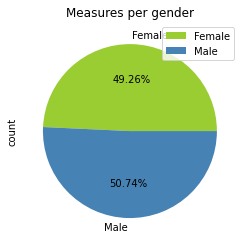

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=clean_data.groupby('Sex').Sex.agg(['count']).reset_index()
colors=['yellowgreen', 'steelblue']
gender_df.plot(kind='pie', y='count', title='Measures per gender', autopct='%1.2f%%', labels=gender_df['Sex'], colors= colors)
plt.show


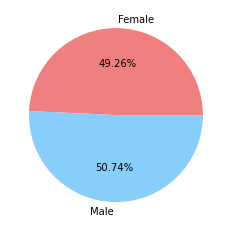

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors=['lightcoral', 'lightskyblue']
plt.pie(gender_df['count'], labels=labels,  colors=colors, autopct='%1.2f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
